In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()
data = cancer.data
labels = cancer.target
print(data.shape,labels.shape)

(569, 30) (569,)


In [3]:
enc = OneHotEncoder()
labels = enc.fit_transform(np.expand_dims(labels,1)).toarray()
print(labels.shape)

(569, 2)


In [4]:
len(data)

569

In [5]:
# Set Seed
seed = 3
tf.set_random_seed(seed)
np.random.seed(seed)

In [6]:
# Split data into train/test = 80%/20%
train_indices = np.random.choice(len(data), round(len(data)*0.8), replace=False)
test_indices = np.array(list(set(range(len(data))) - set(train_indices)))
x_vals_train = data[train_indices]
x_vals_test = data[test_indices]
y_vals_train = labels[train_indices]
y_vals_test = labels[test_indices]

In [7]:
print(x_vals_train.shape)
print(x_vals_test.shape)
print(y_vals_train.shape)
print(y_vals_test.shape)

(455, 30)
(114, 30)
(455, 2)
(114, 2)


In [8]:
# Normalize by column (min-max norm)
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)
    
x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))


In [9]:
# Declare batch size
batch_size = 20

In [10]:
# Initialize placeholders
x_data = tf.placeholder(shape=[None, 30], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,2], dtype=tf.float32)

In [11]:
# Create variables for both Neural Network Layers
hidden_layer_nodes = 30
A1 = tf.Variable(tf.random_normal(shape=[30,hidden_layer_nodes])) # inputs -> hidden nodes
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))   # one biases for each hidden node
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,2])) # hidden inputs -> 1 output
b2 = tf.Variable(tf.random_normal(shape=[2]))   # 1 bias for the output

In [12]:

# Declare model operations
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2), name="op_to_restore")

In [13]:
# Declare loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(final_output, y_target))

In [14]:
# Declare optimizer
my_opt = tf.train.MomentumOptimizer(learning_rate=0.00005, momentum=0.9)
train_step = my_opt.minimize(loss)

In [15]:
# Initialize variables
init = tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

In [16]:
# Training loop
loss_vec = []
test_loss = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    #print(rand_x)
    #print(rand_x.shape)
    rand_y = y_vals_train[rand_index]
    #print(rand_y.shape)
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    #print(temp_loss)
    loss_vec.append(np.sqrt(temp_loss))
    
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: y_vals_test})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%50==0:
        print('Epochs: ' + str(i+1) + '. Loss = ' + str(temp_loss))


Epochs: 50. Loss = 2.4090252
Epochs: 100. Loss = 1.7425117
Epochs: 150. Loss = 0.87549126
Epochs: 200. Loss = 0.4979214
Epochs: 250. Loss = 0.4649474
Epochs: 300. Loss = 0.2654227
Epochs: 350. Loss = 0.111364104
Epochs: 400. Loss = 0.08239646
Epochs: 450. Loss = 0.08275569
Epochs: 500. Loss = 0.1388987
Epochs: 550. Loss = 0.03158307
Epochs: 600. Loss = 0.020841233
Epochs: 650. Loss = 0.0
Epochs: 700. Loss = 0.036877897
Epochs: 750. Loss = 0.038822033
Epochs: 800. Loss = 0.018497568
Epochs: 850. Loss = 0.001733334
Epochs: 900. Loss = 0.04035021
Epochs: 950. Loss = 0.03976764
Epochs: 1000. Loss = 0.034275364


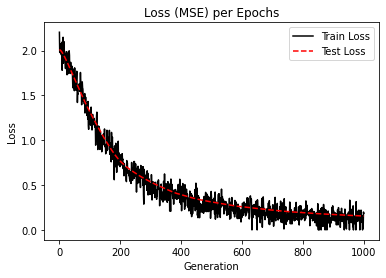

In [17]:
# Plot loss (MSE) over time
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Epochs')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

saver = tf.train.Saver()
